In [8]:
import pandas as pd

#1. Read the data from the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\jsmon\OneDrive\Documents\Fall 2023\CIS 410\Cloned\CIS410_Homework3\hw3_avocado.csv")

In [9]:
#2. Display type, memory consumption, and null count information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
#3. Display the number of unique values in each column
unique_count = df.nunique()
print(unique_count)

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64


In [11]:
#4. Display Default Rows (this will happen automatically)

In [19]:
#5. Display the first and last five rows of data and the first and last four columns of data
print(df.head(), df.tail())
print(df.iloc[:, :4], df.iloc[:, -4:])

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [22]:
#6. Choose any three columns, access them with bracket notation, and display first five rows of this data.
selected_columns = df[['AveragePrice', 'Total Volume', 'type']]
print(selected_columns.head())

   AveragePrice  Total Volume          type
0          1.33      64236.62  conventional
1          1.35      54876.98  conventional
2          0.93     118220.22  conventional
3          1.08      78992.15  conventional
4          1.28      51039.60  conventional


In [26]:
#7. Select one column and access it with dot notation
one_column = df.AveragePrice
print(one_column.head())

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64


In [27]:
#8. Multiply the Total Volume and AveragePrice columns, and store the result in a new column called EstimatedRevenue. Then, display the first five rows of this data to confirm that the column was added and has the correct values
df['EstimatedRevenue'] = df['Total Volume'] * df['AveragePrice']
print(df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  EstimatedRevenue  
0  2015  Albany        85434.7046  
1  2015 

In [29]:
#9. Create a DataFrame that’s grouped by region and type and that includes the average price for the grouped columns. Then, reset the index and display the first five rows
grouped_df = df.groupby(['region', 'type']).agg({'AveragePrice': 'mean',}).reset_index()
print(grouped_df.head())

                region          type  AveragePrice
0               Albany  conventional      1.348757
1               Albany       organic      1.773314
2              Atlanta  conventional      1.068817
3              Atlanta       organic      1.607101
4  BaltimoreWashington  conventional      1.344201


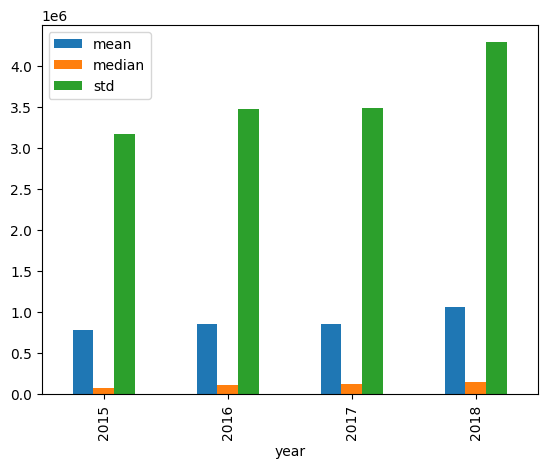

In [32]:
import matplotlib.pyplot as plt

#10. Create a bar plot that shows the mean, median, and standard deviation of the Total Volume column by year
grouped_by_year = df.groupby('year')['Total Volume'].agg(['mean', 'median', 'std'])
grouped_by_year.plot(kind='bar')
plt.show()

In [36]:
#11. Create a new DataFrame that contains the total of the Small Bags, Large Bags, and XLarge Bags columns grouped by type, and then display the DataFrame.
bags_df = df.groupby('type')[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
print(bags_df)

                Small Bags    Large Bags  XLarge Bags
type                                                 
conventional  3.164183e+09  9.259030e+08  56678255.60
organic       1.606877e+08  6.571281e+07     10921.73


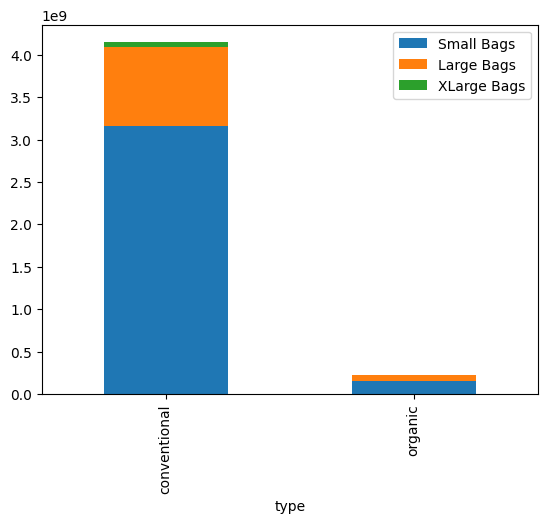

In [37]:
#12. Use the grouped data to create a bar plot that shows the number of small, large, and extra-large bags for both types of avocado.

bags_df.plot(kind='bar', stacked=True)
plt.show()

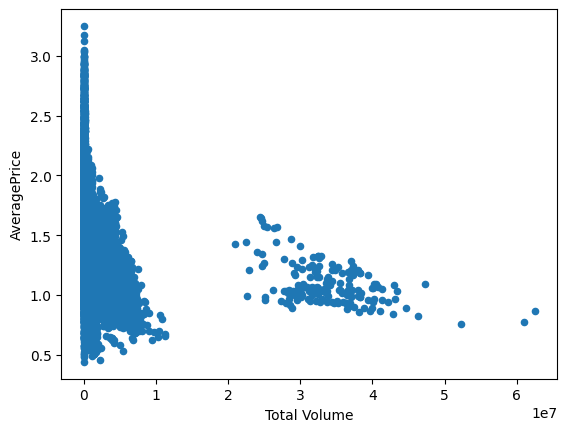

In [38]:
#13. Use the original data to create a scatter plot for the Total Volume and AveragePrice columns
df.plot.scatter(x='Total Volume', y='AveragePrice')
plt.show()